In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Zero-age main-sequence

Last time, we looked very briefly into how stars form from a collapsing and fragmenting molecular cloud. In particular, we had a close look at the pre-main-sequence evolution of a solar-like star and followed its evolution up to the point where the core heats up to temperatures such that core hydrogen burning sets in and the star begins its so-called main-sequence evolution.

Before we study the evolution of stars through core-hydrogen burning and later evolutionary stages up to white-dwarf formation and supernovae, we will now look into the properties of stars of different masses at the point of core-hydrogen ignition. Core-hydrogen ignition is usually referred to as the **zero-age main-sequence** or short **ZAMS**.

Because we do not want you to waste too much time by repeating the pre-MS evolution for several different total stellar masses (it took us several hours to compute about 60 PMS models; if you are interested how we computed the models and you want to try this at home, just talk to us and we can provide guidance), we have done this step for you already and put together two files that contain key stellar properties at the point when stars ignite core hydrogen burning. The first file, `zams-properties.txt`, has a collection of the mass, the luminosity, the radius, the effective temperature, the central density and central temperature (the central temperature is provided in units of $10^7\,\mathrm{K}$). The second file, `zams-convection.txt`, contains information about which parts of stars are radiative and which are convective (provided are the total mass, the mass coordinate within a star and an integer with $0$ for radiative and $1$ for convective regions). Masses are from about $0.15\,\mathrm{M}_\odot$ up to almost $100\,\mathrm{M}_\odot$.

To load the data from the first file, simply execute the command below:

In [2]:
M, logL, logR, Teff, Rho_c, T7_c = np.loadtxt('zams-properties.txt', usecols=(0,1,2,4,5,6), unpack=True)
print(M)

[ 0.125893  0.141254  0.158489  0.177828  0.199526  0.223872  0.251189
  0.281838  0.316228  0.354813  0.398107  0.446684  0.501187  0.562341
  0.630957  0.707946  0.794328  0.891251  1.        1.122018  1.258925
  1.412538  1.584893  1.778279  1.995262  2.238721  2.511886  2.818383
  3.162278  3.548134  3.981072  4.466836  5.011872  5.623413  6.309573
  7.079458  7.943282  8.912509 10.       11.220185 12.589254 14.125375
 15.848932 17.782794 19.952623 22.387211 25.118864 28.183829 31.622777
 35.481339 39.810717 44.668359 50.118723 56.234133 63.095734 70.794578
 79.432823 89.125094]


## Mass-luminosity and mass-radius relations of ZAMS stars

In a first step, plot the mass-luminosity relation of the ZAMS stars and compare to your expectations from homology, namely 
\begin{align}
L \propto \frac{1}{\kappa}\mu^4 M^3.
\end{align}
Simply use the code provided below.

Text(0,0.5,'$\\log\\,L/\\mathrm{L}_\\odot$')

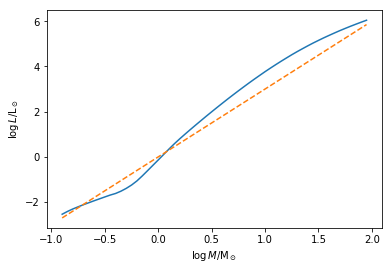

In [3]:
logM = np.log10(M)

plt.plot(logM, logL)

logL_hom = 3.0*logM
plt.plot(logM, logL_hom, '--')

plt.xlabel(r'$\log\,M/\mathrm{M}_\odot$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')


While the homology relation gets the rather steep ML relation right, it cannot reproduce the change in slopes of the true ML relation. This is to be expected given the simplifying assumptions that we have made and that are not true throughout the stars (e.g. we assumed that stars are radiative through most of their interior, that they are composed of an ideal gas and that the opacity is also the same everywhere). In particular, note the kink at $\log M/\mathrm{M}_\odot\approx-0.35$ and that the ML relation becomes shallower with increasing mass.

From homology, we have also obtained
\begin{align}
R \propto \mu^{\frac{\nu-4}{\nu+3}} M^{\frac{\nu-1}{\nu+3}}
\end{align}
where $\nu$ is the exponent of the temperature-scaling of nuclear energy generation inside stars, $\epsilon_\mathrm{nuc}\propto T^\nu$. For stars burning hydrogen via the pp chain, we have $\nu\approx4$, and for stars burning hydrogen via the CNO cycle, we have $\nu\approx18$.

#### Problem 1:
Plot the mass-radius relation and the homology relations for hydrogen burning through the pp-chain and the CNO-cycle. Do not forget to add labels.

Text(0,0.5,'$\\log\\,R/\\mathrm{R}_\\odot$')

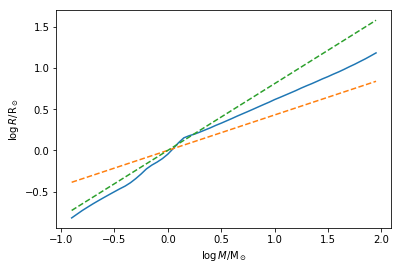

In [4]:
# Your solution here

logM = np.log10(M)

plt.plot(logM, logR)

logL_hom = 0.43*logM
plt.plot(logM, logL_hom, '--')
logL_hom = 0.81*logM
plt.plot(logM, logL_hom, '--')

plt.xlabel(r'$\log\,M/\mathrm{M}_\odot$')
plt.ylabel(r'$\log\,R/\mathrm{R}_\odot$')

Again, homology does a decent job and correctly predicts a rather shallow MR relation, but can of course not get the details right, including the prominent kink at $\log M/\mathrm{M}_\odot\approx0.15$.

***Today's goal will be to understand the individual features in the ML and MR relations and other key properties discussed below***.

## The ZAMS in the Hertzsprung-Russell diagram

Now, plot the position of the ZAMS in the HR diagram and add a few mass labels. You can use the code provided below and then answer the following questions:

#### Problem 2:
1. At which approximate effective temperatures are the two kinks that we identified in the ML and MR relations above? 
    At 3.6 and 3.85 
2. What is the luminosity of very massive ZAMS stars ($M\rightarrow100\,\mathrm{M}_\odot$)? 
    At $10^6$ 

Because such (very) massive stars are so luminous, they are considered cosmic powerhouses that have greatly helped to reionise the Universe after the Dark Ages and provide much kinetic feedback through strong winds and their supernova explosions that is thought to drive galaxy evolution. 

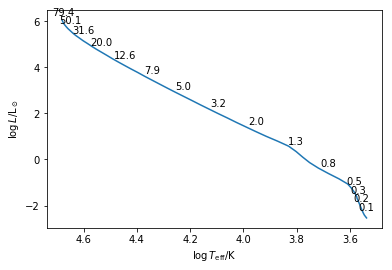

In [5]:
logTeff = np.log10(Teff)

plt.plot(logTeff, logL, '-')

plt.xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')

plt.gca().invert_xaxis()

for i,m in enumerate(M):
    if (i % 4 == 0):
        plt.text(logTeff[i], logL[i]+0.3, '%.1f'%(m), horizontalalignment='center')

## Central density-temperature plane
From the schematic stellar evolution discussed earlier in the lecture and the last lab on PMS evolution, you know that the central temperature and density of stars play an important role to actually understand most of stellar evolution.

#### Problem 3:
As with the ZAMS in the HR diagram, now plot the central-density $\rho_\mathrm{c}$ vs the central-temperature $T_\mathrm{c}$ of ZAMS stars. Also add mass labels as before and identify the $\rho_\mathrm{c}$ and $T_\mathrm{c}$ values corresponding to the kinks in the ML and MR relations that we have identified above. Also add a horizontal line at $\log T_\mathrm{c}/\mathrm{K}=7.23$ (*Hint:* if `logRho_c` are the central densities of the ZAMS stars, you could use `plt.plot(logRho_c, np.ones_like(logRho_c)*7.23, '--')` to obtain a horizontal line).

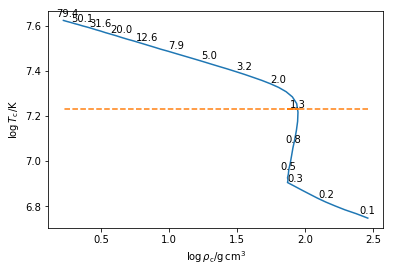

In [6]:
# Your solution here
logRho_c = np.log10(Rho_c)
logT_c = np.log10(T7_c)+7.0

plt.plot(logRho_c, logT_c, '-')
plt.plot(logRho_c, np.ones_like(logRho_c)*7.23, '--')

plt.xlabel(r'$\log\,\rho_\mathrm{c}/\mathrm{g}\,\mathrm{cm}^{3}$')
plt.ylabel(r'$\log\,T_\mathrm{c}/\mathrm{K}$')

for i,m in enumerate(M):
    if (i % 4 == 0):
        plt.text(logRho_c[i], logT_c[i]+0.02, '%.1f'%(m), horizontalalignment='center')

#### Problem 4:
1. What is the density of water at room temperature and how does it compare to the central densities of a $1\,\mathrm{M}_\odot$ and a $20\,\mathrm{M}_\odot$ star? 
2. Identify the rough mass ranges that likely correspond to the kinks in the ML and MR relations.

From the above curve, you can see that stars become hotter and less dense with increasing mass. Because the temperature scaling of nuclear burning by the CNO cycle ($\nu\approx18$) is much steeper than that of the pp chain ($\nu\approx4$), there is a transition temperature above which the energy generation by the CNO cycle dominates over that by the pp chain. For the chosen chemical composition here, this transition is roughly at $T_\mathrm{c}\approx1.7\times10^7\,\mathrm{K}$, i.e. at the horizontal line that you added to your graph. So from the graph, you can see that hydrogen burning proceeds mainly via the CNO cycle in stars initially more massive than $\approx1.3\,\mathrm{M}_\odot$ and burning via the pp chain is dominant below this mass.

Because of the much higher temperature sensitivity of hydrogen burning via the CNO cycle, nuclear burning in such star is much more centrally concentrated.

## Radiative and convective regions in ZAMS stars
We now come back to main reason why you observe two prominent kinks in basically all the relations studied here. This is related to the occurrence of convection in stars. 

First, load the information about radiative and convective regions in ZAMS stars from the provided second file `zams-convection.txt`.

In [7]:
x, y, z = np.loadtxt('zams-convection.txt', usecols=(0,1,2), unpack=True)

We now plot radiative and convective regions by using the `tricountourf` functionality of `matplotlib`. This function uses the unstructured grid of ZAMS masses $M$ and mass coordinates $m/M$ to interpolate the data and plot a two-dimensional map of radiative (value of $0$) and convective (value of $1$) regions. We also added labels such that you can identify the regions easily. 

*Note:* The interpolation is not perfect and we run 'only' some 60 stars of different initial masses through the pre-MS phase to the ZAMS such that you will observe wiggles and numerical artifacts in the plot. You can find smoother versions of the plot in essentially all text books on stellar evolution but our own plot should suffice to understand the main features.

Text(0.15,0.9,'Convective')

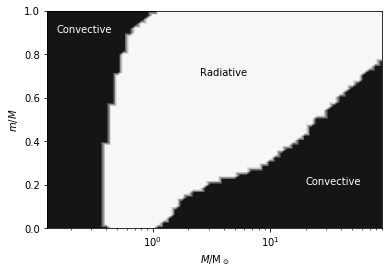

In [8]:
conv = plt.tricontourf(x, y, z, cmap='Greys')

plt.xscale('log')
plt.xlabel(r'$M/\mathrm{M}_\odot$')
plt.ylabel(r'$m/M$')

plt.text(2.5, 0.7, 'Radiative')
plt.text(20, 0.2, 'Convective', color='w')
plt.text(0.15, 0.9, 'Convective', color='w')

#### Problem 5:
1. Identify the rough mass ranges in which ZAMS stars are fully convective, have a radiative core and convective envelope, and have a convective core and a radiative envelope. How do these mass ranges compare to the mass ranges you inferred for the two main kinks in the central density and central temperature plane of stars?
2. Can you now link the kinks in the ZAMS in the HR diagram and the ML and MR relations to the three mass ranges?

Next, we will look into the origin of the convective regions in the above diagram. Because we are dealing with ZAMS stars, the chemical composition throughout the stars us almost homogenous and there are no chemical gradient such that the Schwartzschild criterion for convection applies, i.e. convective regions fulfill
\begin{align}
\nabla_\mathrm{rad} = \frac{3\kappa}{16\pi a c G} \frac{l}{m} \frac{P}{T^4} > \nabla_\mathrm{ad}.
\end{align}
So for high opacities $\kappa$, large $l/m$ ratios and small $\nabla_\mathrm{ad}$, convection occurs because photons alone cannot transport all the energy. In the PMS lab, we already saw that stars on the Hayashi line are fully convective because of the large opacity in relatively cool stars. For example, the electron scattering opacity is $\kappa_\mathrm{es}\approx0.2\,(1+X)\,\mathrm{cm}^2\,\mathrm{g}^{-1}$ while the opacity in the outer envelope of a $1\,\mathrm{M}_\odot$ can reach values of up to $10^5\,\mathrm{cm}^2\,\mathrm{g}^{-1}$.

#### Problem 6:
1. Given the above reminder, explain the occurrence of convective regions in the three types of stars identified above.
2. What is the size of the convective core of very massive stars, e.g. at $80\,\mathrm{M}_\odot$? Why are these convective cores so huge? *Hint:* Consider $\nabla_\mathrm{ad}=1-1/\gamma_\mathrm{ad}$; what is its value for stars dominated by an ideal gas and what is it for stars dominated by radiation pressure? 0.4 (gamma is 5/3)

#### Student-report part 1:
Take the ML relation of ZAMS stars and fit piecewise power-law functions to it, e.g., for mass ranges of

* $0.15\text{--}0.4\,\mathrm{M}_\odot$,
* $0.6\text{--}2.0\,\mathrm{M}_\odot$,
* $2\text{--}5\,\mathrm{M}_\odot$,
* $5\text{--}20\,\mathrm{M}_\odot$, 
* $20\text{--}50\,\mathrm{M}_\odot$ and 
* $50\text{--}80\,\mathrm{M}_\odot$.

Compare the exponent $\alpha$ of the ML relation ($L\propto M^\alpha$) to the expectations from homology. What do you notice? Why is the ML relation shallower for more massive stars? For very large masses, $\alpha\rightarrow1$. Do you know why? 

*Hint:* Look up the Eddington limit of stars. What does it say and how is it connected to very massive stars?

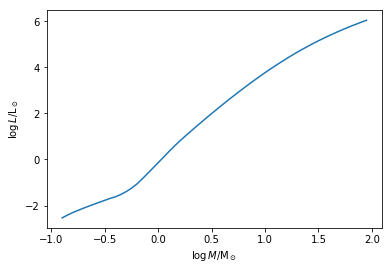

In [9]:
# HR diagram - your solution here
#plt.plot(logM, logL_hom, '--')

plt.xlabel(r'$\log\,M/\mathrm{M}_\odot$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')
plt.plot(logM, logL)
#plt.yscale('log')

In [10]:
10**logM

array([ 0.125893,  0.141254,  0.158489,  0.177828,  0.199526,  0.223872,
        0.251189,  0.281838,  0.316228,  0.354813,  0.398107,  0.446684,
        0.501187,  0.562341,  0.630957,  0.707946,  0.794328,  0.891251,
        1.      ,  1.122018,  1.258925,  1.412538,  1.584893,  1.778279,
        1.995262,  2.238721,  2.511886,  2.818383,  3.162278,  3.548134,
        3.981072,  4.466836,  5.011872,  5.623413,  6.309573,  7.079458,
        7.943282,  8.912509, 10.      , 11.220185, 12.589254, 14.125375,
       15.848932, 17.782794, 19.952623, 22.387211, 25.118864, 28.183829,
       31.622777, 35.481339, 39.810717, 44.668359, 50.118723, 56.234133,
       63.095734, 70.794578, 79.432823, 89.125094])

In [17]:
logM

array([-0.89999842, -0.84999925, -0.80000087, -0.74999986, -0.7000005 ,
       -0.65000022, -0.59999938, -0.55000045, -0.49999968, -0.45000048,
       -0.40000019, -0.3499996 , -0.3000002 , -0.25000025, -0.20000024,
       -0.14999987, -0.10000013, -0.04999997,  0.        ,  0.04999982,
        0.09999986,  0.15000014,  0.19999995,  0.2499999 ,  0.29999993,
        0.34999997,  0.39999993,  0.45000001,  0.50000005,  0.55000001,
        0.60000003,  0.65000001,  0.69999997,  0.74999998,  0.79999997,
        0.85000001,  0.89999998,  0.94999998,  1.        ,  1.05000002,
        1.1       ,  1.14999999,  1.2       ,  1.25      ,  1.3       ,
        1.34999999,  1.39999999,  1.45      ,  1.50000001,  1.55      ,
        1.6       ,  1.65      ,  1.7       ,  1.75      ,  1.8       ,
        1.85      ,  1.9       ,  1.95      ])

In [12]:
def slope(dx, dy):
    return (dy / dx) if dx else None

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({}, {})'.format(self.x, self.y)

    def __repr__(self):
        return 'Point({}, {})'.format(self.x, self.y)

    def halfway(self, target):
        midx = (self.x + target.x) / 2
        midy = (self.y + target.y) / 2
        return Point(midx, midy)

    def distance(self, target):
        dx = target.x - self.x
        dy = target.y - self.y
        return (dx*dx + dy*dy) ** 0.5

    def reflect_x(self):
        return Point(-self.x,self.y)

    def reflect_y(self):
        return Point(self.x,-self.y)

    def reflect_x_y(self):
        return Point(-self.x, -self.y)

    def slope_from_origin(self):
        return slope(self.x, self.y)

    def slope(self, target):
        return slope(target.x - self.x, target.y - self.y)

    def y_int(self, target):       # <= here's the magic
        return self.y - self.slope(target)*self.x

    def line_equation(self, target):
        slope = self.slope(target)

        y_int = self.y_int(target)
        if y_int < 0:
            y_int = -y_int
            sign = '-'
        else:
            sign = '+'

        return 'y = {}x {} {}'.format(slope, sign, y_int)

    def line_function(self, target):
        slope = self.slope(target)
        y_int = self.y_int(target)
        def fn(x):
            return slope*x + y_int
        return fn


In [18]:
c1 = Point(-0.84999925, -2.413503)
d1 = Point(-0.49999968, -1.619171)
print(c1.line_equation(d1))

c2 = Point(4.50238131e+01,1.63274396e+00)
d2 = Point(1.14109211e+02,4.09214110e+00)
print(c2.line_equation(d2))

c3 = Point(1.14109211e+02,4.09214110e+00)
d3 = Point(3.69555994e+02,3.73721635e+00)
print(c3.line_equation(d3))

c4 = Point(3.69555994e+02,4.09214110e+00)
d4 = Point(9.16892670e+02,6.98714721e+00)
print(c4.line_equation(d4))

c5 = Point(9.16892670e+02,6.98714721e+00)
d5 = Point(8.32494014e+06, 6.01085228e+06)
print (c5.line_equation(d5))

y = 2.269522788270854x - 0.4844103321118651
y = 0.035599377216585446x + 0.029924253724058714
y = -0.0013894273626456274x + 4.250687560093303
y = 0.005289260224907714x + 2.1374632800595665
y = 0.7221081818555491x - 655.10855168038


#### Student-report part 2:
So far, we have looked into stars with 'solar' composition, that is models with an initial hydrogen mass fraction of $X=0.70$, helium mass fraction of $Y=0.28$ and metallicity of $Z=0.02$ (this metallicity means that all chemical elements heavier than helium make up 2% of the total mass of a star).

Early in the Universe, there was only hydrogen, helium and some traces mainly of lithium and beryllium, so $Z\approx0$. Over the course of evolution, stars then have produced all the heavy chemical elements. Next, we look into stars that have $X=0.757$, $Y=0.242$ and $Z=0.001$. The same summary as for the solar metallicity stars is in the file `zams-properties-low-Z.txt` and the convection information in the file `zams-convection-low-Z.txt`.

1. Add the ZAMS of these lower metallicity stars to the above HR diagram. What do you observe? Do you know why?
2. Also add the $\rho_\mathrm{c}$-$T_\mathrm{c}$ relation to the above diagram. You will notice that the temperature threshold for CNO burning is now at higher temperatures - do you understand why?

*Hint:* The chemical composition directly influences $\mu$ mainly via $Y$ and the opacity of stellar matter mainly via the metallicity $Z$ (but also $Y$). Also, nuclear burning may be influenced because of different chemical abundances. For example, if there are no carbon, nitrogen and oxygen, there can be no hydrogen burning via the CNO cycle.

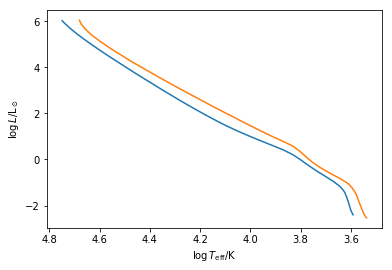

In [14]:
M_, logL_, logR_, Teff_, Rho_c_, T7_c_ = np.loadtxt('zams-properties-low-Z.txt', usecols=(0,1,2,4,5,6), unpack=True)

logTeff_ = np.log10(Teff_)
logRho_c_ = np.log10(Rho_c_)
logT_c_ = np.log10(T7_c_)+7.0


#plt.plot(logRho_c, logT_c, '-')
plt.plot(logTeff_,logL_)
plt.plot(logTeff, logL)
plt.xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')
plt.gca().invert_xaxis()


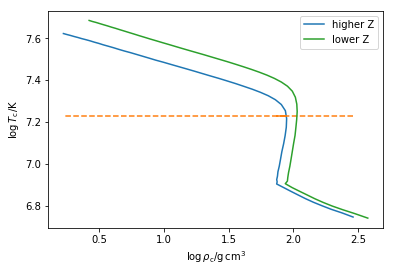

In [15]:
plt.plot(logRho_c, logT_c, '-',label='higher Z')
plt.plot(logRho_c, np.ones_like(logRho_c)*7.23, '--')
plt.plot(logRho_c_, logT_c_, '-',label='lower Z')
plt.xlabel(r'$\log\,\rho_\mathrm{c}/\mathrm{g}\,\mathrm{cm}^{3}$')
plt.ylabel(r'$\log\,T_\mathrm{c}/\mathrm{K}$')
plt.legend()
## add masses number from code above
## change colors